# Install Libraries

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.6 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 65.2 MB/s eta 0:00:00


In [3]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 12.6 MB/s eta 0:00:00


In [4]:
!pip install renderlab

# Import Libraries

In [5]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
import time
import renderlab as rl

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
  return datetime.utcnow().replace(tzinfo=utc)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294

# Description of the three basic functions of the gymnasium environment



*   reset(): Επαναφέρει το περιβάλλον στην αρχική του κατάσταση.Επίσης επιστρέφει την αρχική παρατήρηση και πληροφορίες. Απαιτείται πριν από την κλήση του βήματος
*   step(): Δέχεται μία ενέργεια από τον πράκτορα σαν όρισμα. Επιστρέφει: νέα κατάσταση,την ανταμοιβή για την εκτέλεση αυτών των ενεργειών, αν το επεισόδιο τελείωσε επιτυχώς ή αποτυχημένα, αν το επεισόδιο έληξε λόγω χρονικού ορίου, πρόσθετες πληροφορίες
*  render(): Απεικονίζει τα περιβάλλοντα για να βοηθήσει στην οπτικοποίηση αυτού που βλέπει ο πράκτορας.Χρησιμοποιείται για παρακολούθηση ή debugging










# Description of the environment LunarLander-v3

*  Observation Space είναι διάνυσμα 8 πραγματικών τιμών οι οποίες είναι: Οι συντεταγμένες του προσγειωτή σε x & y,Οριζόντια ταχύτητα,Κάθετη ταχύτητα, Γωνία σκάφους, Γωνιακή ταχύτητα, Επαφή αριστερού ποδιού με έδαφος (0 ή 1), Επαφή δεξιού ποδιού με έδαφος (0 ή 1)
*  Action Space περιλαμβάνει 4 διακριτές ενέργειες:

     0: Καμία ενέργεια

     1: Ενεργοποίηση αριστερής μηχανής

      2: Ενεργοποίηση κύριας μηχανής

     3: Ενεργοποίηση δεξιάς μηχανής
*  Reward Function: Μετά από κάθε βήμα απονέμεται μια ανταμοιβή. Η συνολική ανταμοιβή ενός επεισοδίου είναι το άθροισμα των ανταμοιβών για όλα τα βήματα εντός αυτού του επεισοδίου.


# Creating an environment

In [6]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output_lander")

# Creation of a random agent and visualization of its gameplay

In [7]:
observation, info = env.reset()


while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Five Episodes from random agent and calculation of the mean score

In [19]:
rewards = []
episodes=5
env_name="LunarLander-v3"
for ep in range(episodes):
   env = gym.make(env_name)
   obs, info = env.reset()
   done = False
   total_reward = 0

   while not done:
       action = env.action_space.sample()
       obs, reward, terminated, truncated, info= env.step(action)
       done = terminated or truncated
       total_reward += reward

   rewards.append(total_reward)
   print(f"Episode {ep+1} reward: {total_reward:.2f}")
mean_random=np.mean(rewards)
print("Mean Random Agent Reward:", mean_random)

Episode 1 reward: -136.02
Episode 2 reward: -84.36
Episode 3 reward: -110.10
Episode 4 reward: -99.83
Episode 5 reward: -84.18
Mean Random Agent Reward: -102.89919824677274


# Function that calculates the average reward over 5 episodes for a model

In [12]:
def evaluate_agent(model, env_name="LunarLander-v3", episodes=5):
    rewards = []

    for ep in range(episodes):
        env = gym.make(env_name)
        obs, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

        rewards.append(total_reward)
        print(f"Episode {ep+1} reward: {total_reward:.2f}")

    return np.mean(rewards)

# Train and Evaluate DQN model

In [21]:
env = gym.make("LunarLander-v3")

start = time.time()
dqn = DQN(
    "MlpPolicy",
    env,
    verbose=1
)

dqn.learn(total_timesteps=50_000)
dqn_time = time.time() - start

mean_dqn=evaluate_agent(dqn)
print("DQN Mean Reward:", mean_dqn)
print("DQN Training Time:", dqn_time)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | -189     |
|    exploration_rate | 0.913    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1961     |
|    time_elapsed     | 0        |
|    total_timesteps  | 459      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61     |
|    n_updates        | 89       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | -192     |
|    exploration_rate | 0.831    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1571     |
|    time_elapsed     | 0        |
|    total_timesteps  | 891      |
| train/              |        

# Train and Evaluate PPO model

In [16]:
env = gym.make("LunarLander-v3")

start = time.time()
ppo = PPO(
    "MlpPolicy",
    env,
    verbose=1
)
ppo.learn(total_timesteps=300_000)
ppo_time = time.time() - start
mean_ppo = evaluate_agent(ppo)
print("PPO Mean Reward:", mean_ppo)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.7     |
|    ep_rew_mean     | -155     |
| time/              |          |
|    fps             | 1558     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 92.6       |
|    ep_rew_mean          | -178       |
| time/                   |            |
|    fps                  | 1137       |
|    iterations           | 2          |
|    time_elapsed         | 3          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00963997 |
|    clip_fraction        | 0.0676     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38

Μετά από κάποιες δοκιμές του αριθμού βημάτων με τη χρήση των προεπιλεγμένων παραμέτρων, παρατηρείται ότι για μικρό αριθμό βημάτων εκπαίδευσης (π.χ. < 100.000 timesteps) ο αλγόριθμος DQN παρουσιάζει ταχύτερη αρχική σύγκλιση σε σχέση με τον PPO, επιτυγχάνοντας υψηλότερο μέσο reward. Αντίθετα, καθώς αυξάνεται ο αριθμός των timesteps, ο PPO εμφανίζει σταθερότερη και αποδοτικότερη μάθηση, ξεπερνώντας την απόδοση του DQN. Έτσί χρησιμοποιήθηκε μεγάλο timesteps για PPO και μικρότερο για DQN.

# Training Time Graph

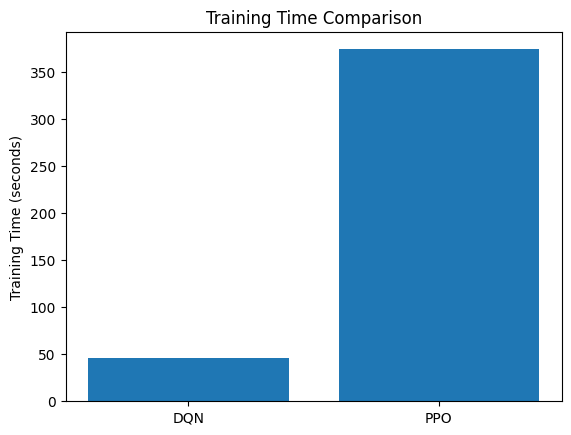

In [22]:
plt.figure()
plt.bar(["DQN", "PPO"], [dqn_time, ppo_time])
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.show()

# Average Reward Graph

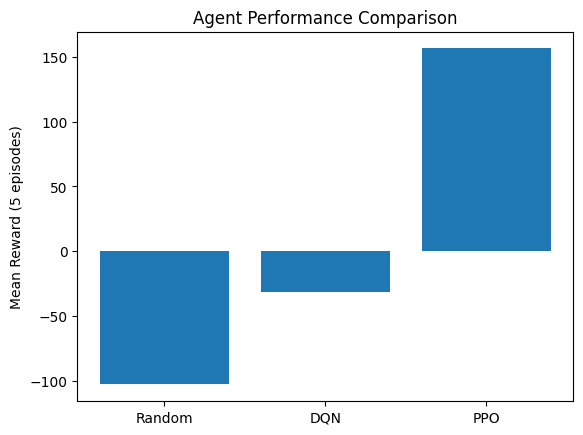

In [23]:
plt.figure()
plt.bar(["Random", "DQN", "PPO"], [mean_random, mean_dqn, mean_ppo])
plt.ylabel("Mean Reward (5 episodes)")
plt.title("Agent Performance Comparison")
plt.show()